# Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

# Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


# Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.

# Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression, Ridge, SGDRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor  as KNN
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score,ShuffleSplit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
import xgboost 
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


- Looking at the dataset at an early stage, we can see that "Unnamed" and"XLarge Bags" are of no use, later we will drop them.

# Exploratory Data Analysis

In [3]:
# Checking Size:
df.shape

(18249, 14)

- Data set contains 18249 rows & 14 columns.

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Now lets check the datatype in different columns.

In [5]:
# This will give Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- From the above its clear that the DATE, TYPE & REGION columns are object type and rest most of the dataset is either integer or float.

Changing the date formate into more machine understanding language (i.e, either int or float).

# Date Column Treatment

In [6]:
# Extract month, year and date into different columns to do better understanding of data:-
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [7]:
df.drop(['Unnamed: 0','Date'],axis=1,inplace=True)

In [8]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [9]:
# Confirming the data type again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  month         18249 non-null  int64  
 13  day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


- Apart from type and year rest data are float and Integer.

Lets analyse more details in the dataset.

In [10]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
day             0
dtype: int64

- No missing values in the dataset.

In [11]:
# check for duplicate data
df.duplicated().sum()

0

In [12]:
#Checking for unique elements in each of the columns
df.nunique() 

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
month              12
day                31
dtype: int64

In [13]:
# stats of the dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


- From the above description it is observed that columns like Large Bags and XLarge Bags may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.
- A higher Std than mean in Total Bags, Small Bags and, XLarge Bags columns indicates skewness.

In [14]:
#Checking for empty observations
df.loc[df['AveragePrice'] == " "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day


- So I don't have any empty observations in my target column.

In [15]:
# renaming column names into meaningful names
df = df.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'})
df

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


# Data Visualization

In [16]:
continuous_cols = ['AveragePrice', 'Total Volume','PLU_4046','PLU_4225','PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_cols = ['year', 'Day', 'Month', 'type', 'region']

- This are two types of columns in the dataset.i.e.,Continuous columns and Categorical columns.

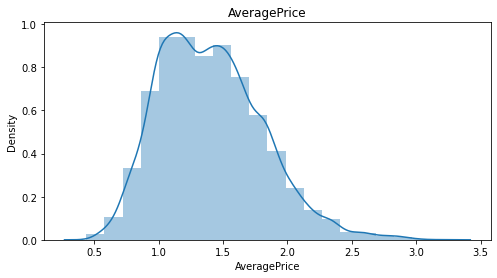

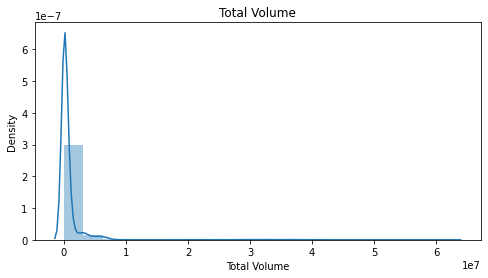

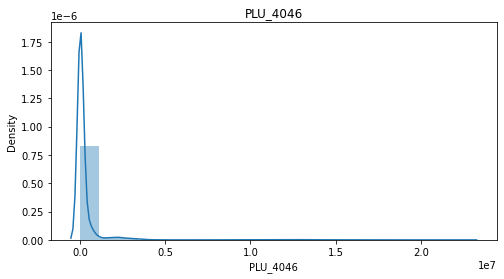

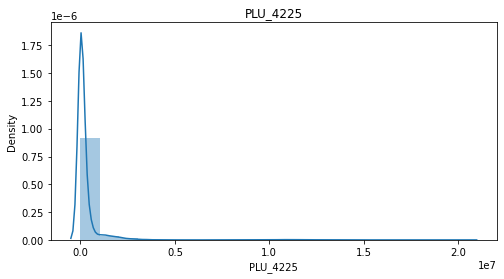

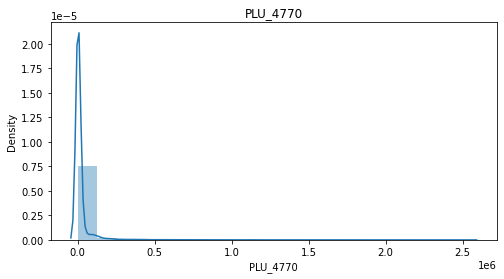

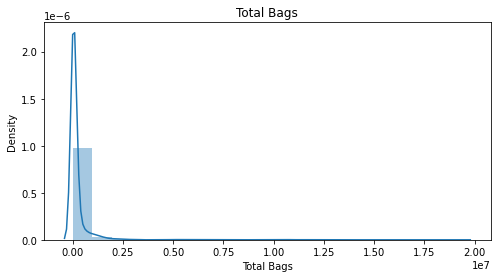

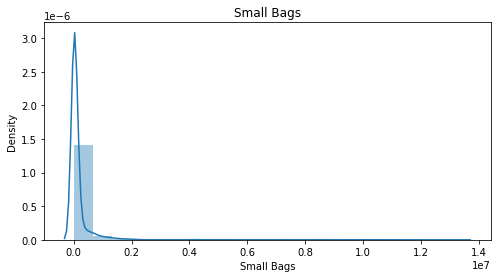

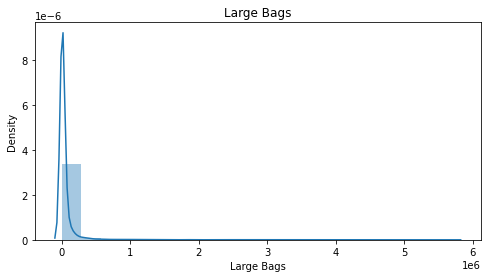

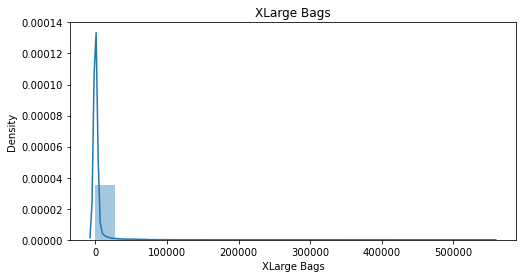

In [17]:
for i in df[continuous_cols]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 20)
    plt.title(i)
    plt.show()

- we can see that the data in Continous Columns are skewed.

In [18]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [19]:
#finding sale of avacado in given years :
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

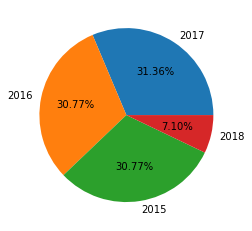

In [20]:
#Ploting pie chart for years
labels='2017','2016','2015','2018'
fig, ax = plt.subplots()
ax.pie(df['year'].value_counts(), labels=labels, autopct='%1.2f%%')
plt.show()

- in 2018 percentage is low compared to rest of the years.

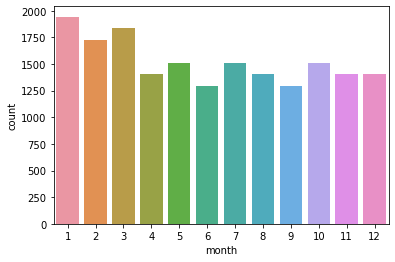

In [21]:
#Count plot for Month
sns.countplot(df['month']);

- January, February and March shows maximum number of count in compare to other months

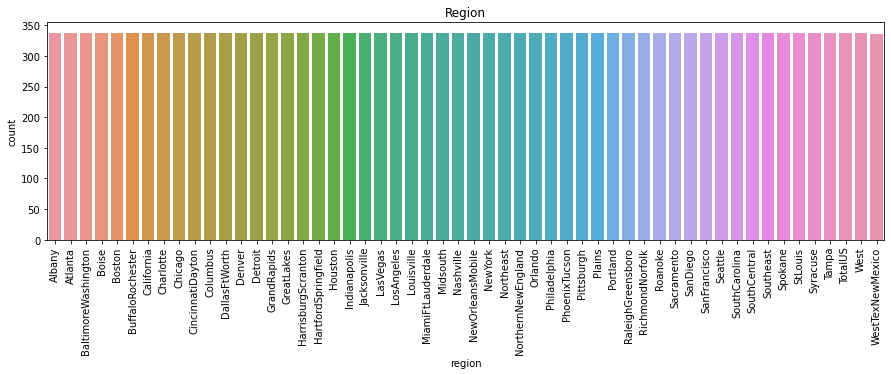

In [22]:
#region

plt.figure(figsize=(15,4))
sns.countplot(df["region"])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

- In all the regions the count is almost same which means there is equal importance in the regions for avacado.

Organic vs Conventional : 

The main difference between organic and conventional food products is the chemicals involved during production and processing. Interest in organic food products has grown steadily in recent years with the emergence of new healthy super fruits. Let's see if this is also the case with our dataset.

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

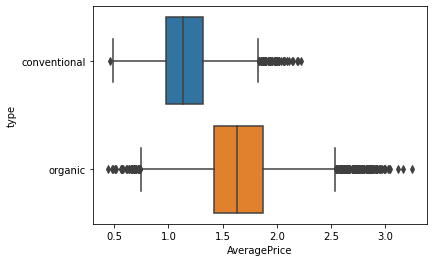

In [23]:
sns.boxplot(y="type", x="AveragePrice", data=df)

It looks like Conventional is in more demand. Now, let's look at the average price distribution

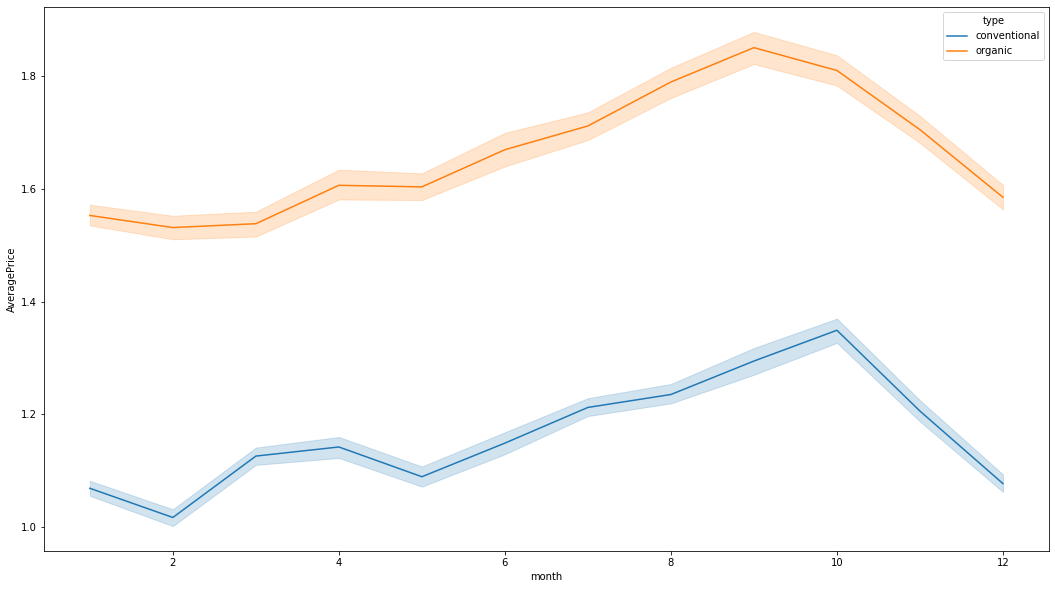

In [24]:
# Create a plot
plt.figure(figsize=(18,10))
sns.lineplot(x="month", y="AveragePrice", hue='type', data=df)
plt.show()

Organic avocados are more expensive. This is obvious because they are more expensive to grow and we all like natural products and are willing to pay a higher price for them. But it's likely that the price of avocado doesn't just depend on the type. Let's look at the price of avocado in different regions in different years. Let's start with organic avocados.

<AxesSubplot:xlabel='AveragePrice'>

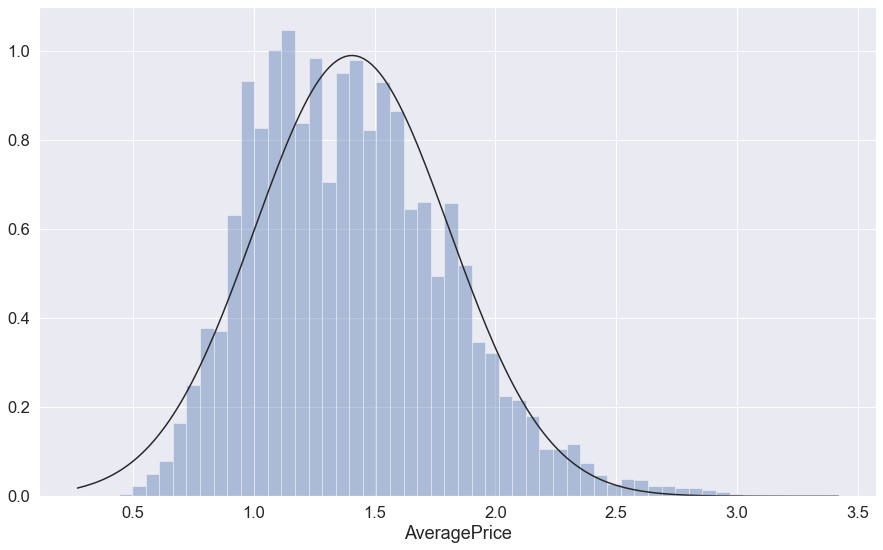

In [25]:
#price distribution of our favorite avocado!

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

- Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'PLU_4046'}>,
        <AxesSubplot:title={'center':'PLU_4225'}>,
        <AxesSubplot:title={'center':'PLU_4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

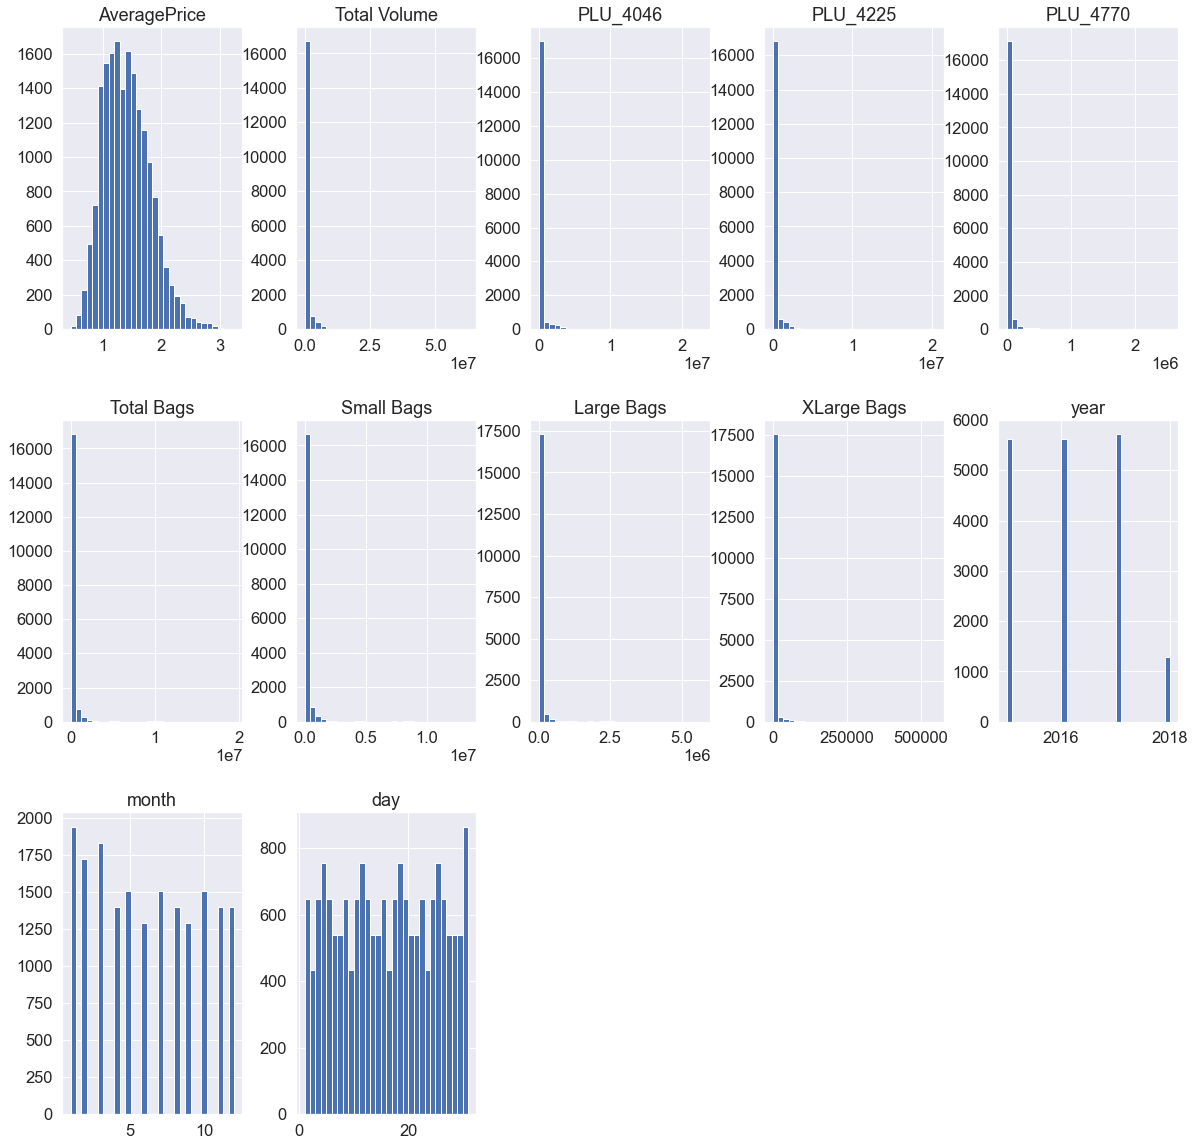

In [26]:
df.hist(figsize=(20,20), grid = True, layout = (3,5), bins = 30)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

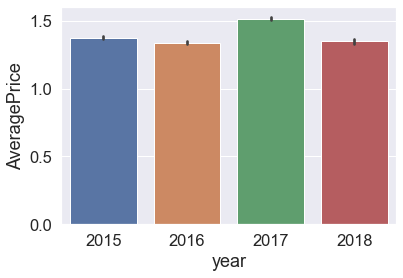

In [27]:
#Visualizing target variable dependency on year means which year has maximum Average Price:-
sns.barplot(x = "year" , y = "AveragePrice" ,data=df )

- We can observe that there was a spike in average price in the year 2017

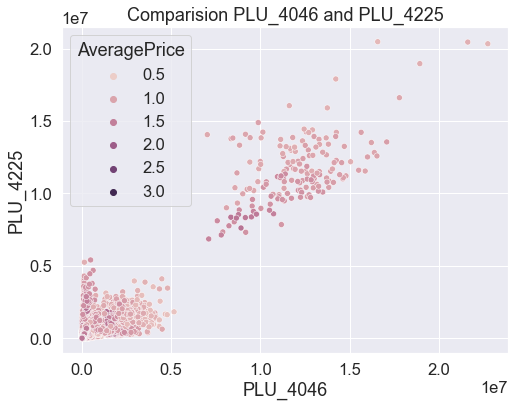

In [28]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision PLU_4046 and PLU_4225')
sns.scatterplot(df['PLU_4046'],df['PLU_4225'],hue=df["AveragePrice"]);

- The points are dense in 0 to 0.5 for both 4046 and 4225 PLU, which means these both has less AveragePrice count.

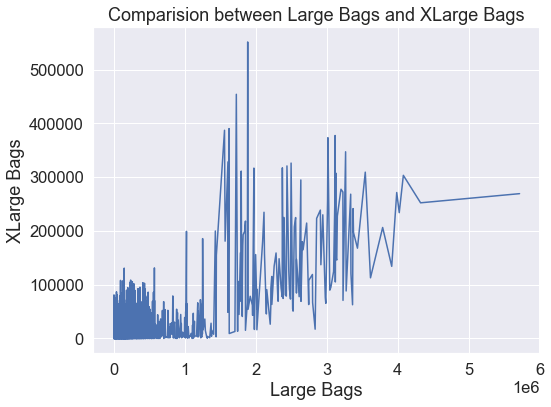

In [29]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Large Bags and XLarge Bags')
sns.lineplot(df['Large Bags'],df['XLarge Bags']);

- We can observe some extreme outliers here.So we will deal with it.

Now lets plot Average price distribution based on region

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

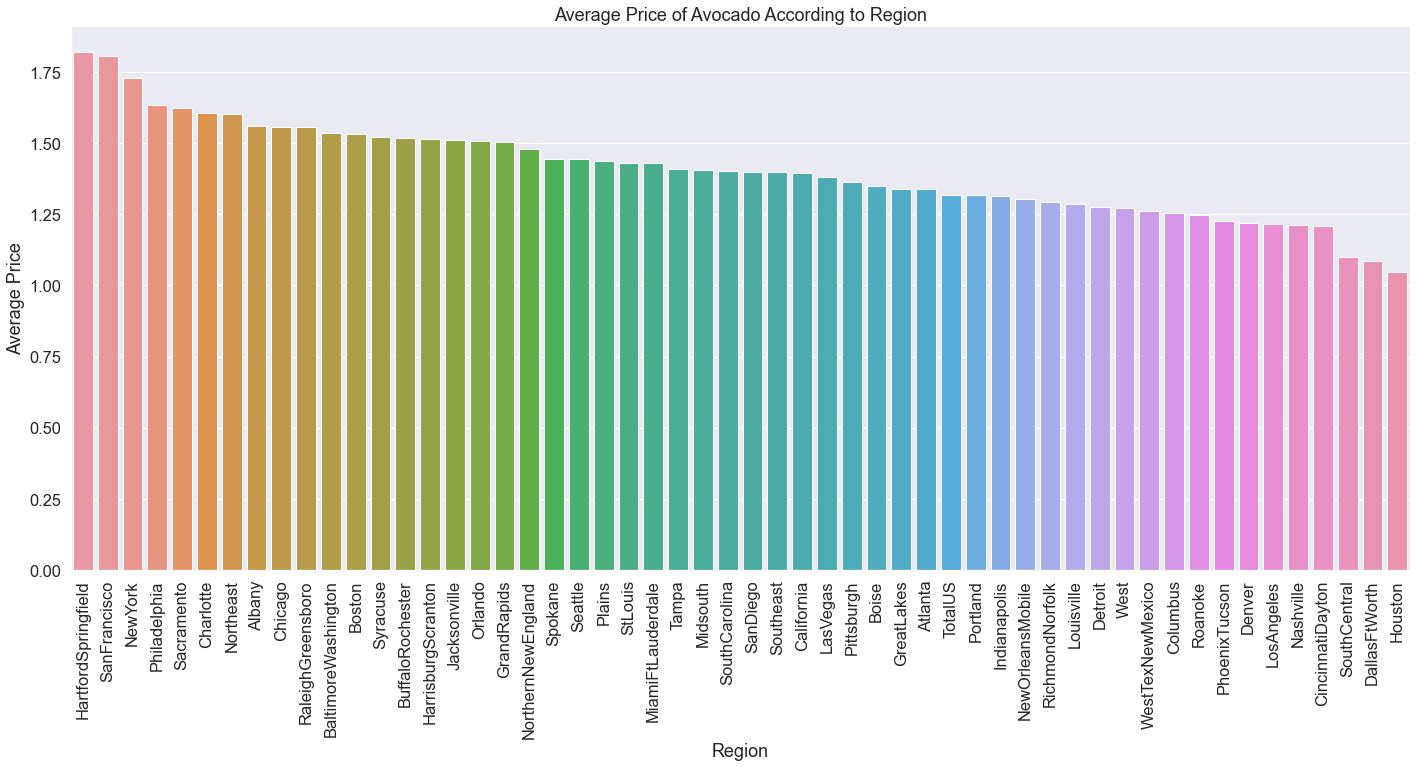

In [30]:
#TOP 5 regions where Average price are very high

region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

- Looks like HartfordSpringfield, SanFrancisco, NewYork, Philadelphia, Sacramento region have very high average price.
- And Houston, DallasFtWorth, South Central region have low average price compared to rest of the regions.

Text(0.5, 1.0, 'Average of Total Volume According to Region')

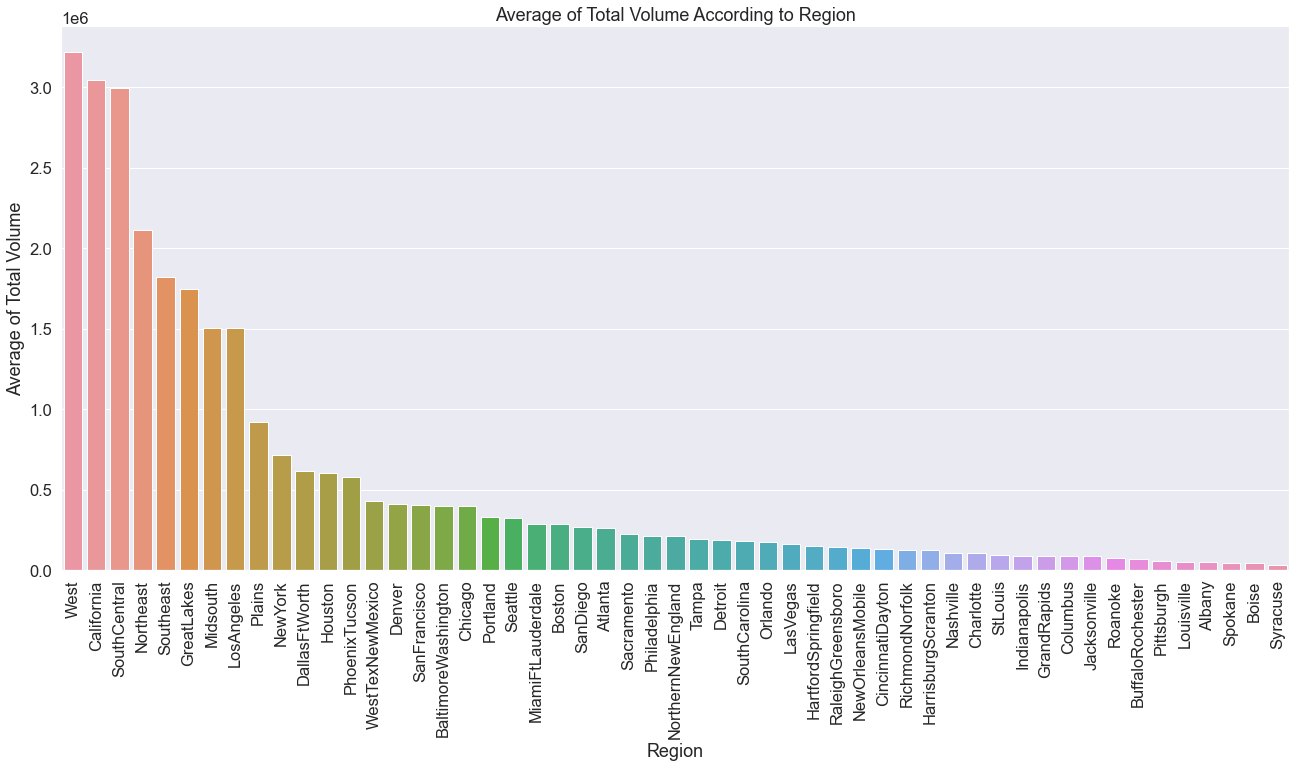

In [31]:
 # TOP 5 regions where Average consumption is very high
    
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

- Looks like West, California, South Central region have very high average total volume.
- And Syracuse, Boise, Spokane, Albany, Louisville region have low average total volume compared to rest of the regions.

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

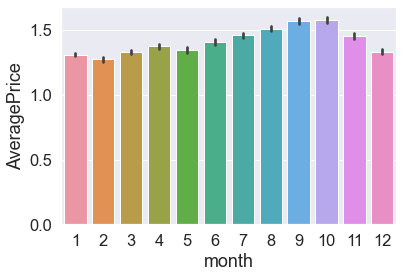

In [32]:
# Relation between Month and AveragePrice
sns.barplot(x = "month" , y = "AveragePrice" ,data=df )

- During October, September and August the Average price is more compared to rest of the months in the year.

# EDA Concluding Remarks
- Continous columns have skewness
- Spike in average price in the year 2017 as the demand was little high in SanFranciso region.
- Price is very high in HartfordSpringfield Region.
- Consumption is very high in West region
- We can see that Organic cost roughly 34% more than Conventional.
- When looking over their average volume sold, we see that in 2019 Organic Avocados roughly sold 72,000-units, Conventional Avocados sold around 2,000,000-units. Taking these two averages, Organic Avocados sold roughly 186% more than Conventional.

- After cleaning, compiling, and organizing the relevant datasets we can see that Organic Avocados are consistently more expensive than Conventional Avocados. Conversely, we see that Conventional Avocados have a higher average volume sold than Organic.
- These results pose an inverse relationship between cost and units sold ultimately suggesting that the lower cost leads to higher sales.

# Data Preprocessing

Two columns are categorical type and region,So using LabelEncoder,Converting it into numerical value.

In [33]:
col = ['type','region']
le = LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])
df

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [34]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

- Here we have converted the datatype of "type" column from object to integer data type that is 0-conventional, 1- organic, so that our model can understand properly and easily.

In [35]:
df['region'].value_counts()

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
6     338
47    338
53    335
Name: region, dtype: int64

- Here we have converted the datatype of "region" column from object to integer datatype, so that our model can understand properly and easily.

Lets confirm the LabelEncoding.

In [36]:
df.dtypes

AveragePrice    float64
Total Volume    float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
month             int64
day               int64
dtype: object

- From above its clear that all columns are now int or float data types.

Lets confirm the null values also before going further

In [37]:
# Checking for missing values:-
df.isnull().sum()

AveragePrice    0
Total Volume    0
PLU_4046        0
PLU_4225        0
PLU_4770        0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
day             0
dtype: int64

- So we can see ,Not any null values are present.

# Correlation:

In [38]:
# Checking correlation:
df.corr()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689,-0.009747
PLU_4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803,-0.010159
PLU_4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
PLU_4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000013


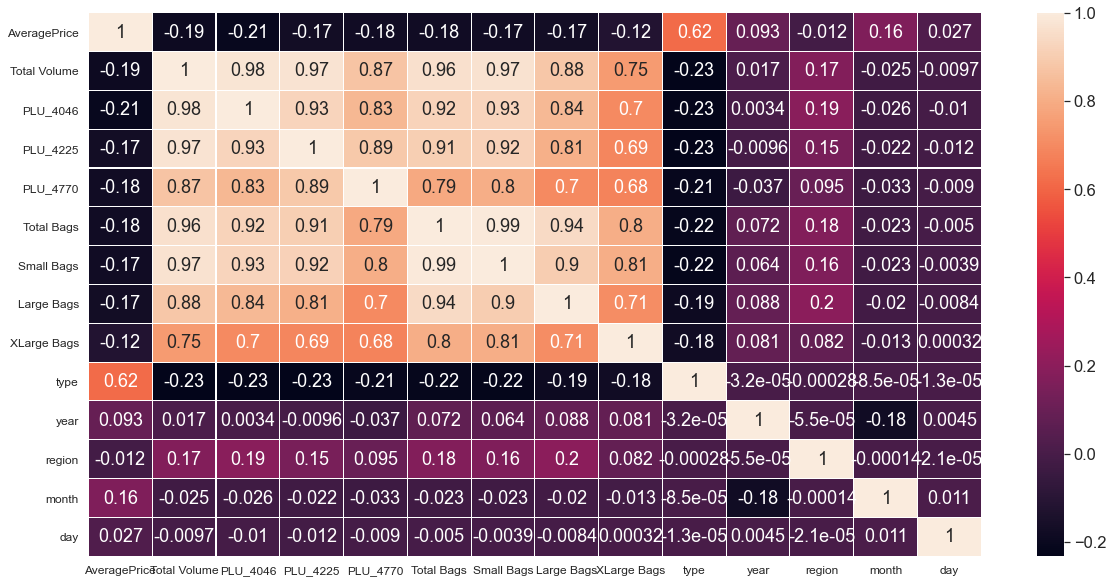

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=.1,annot=True)
plt.yticks(rotation=0,fontsize=12);
plt.xticks(rotation=0,fontsize=12);

# Outliers Detection

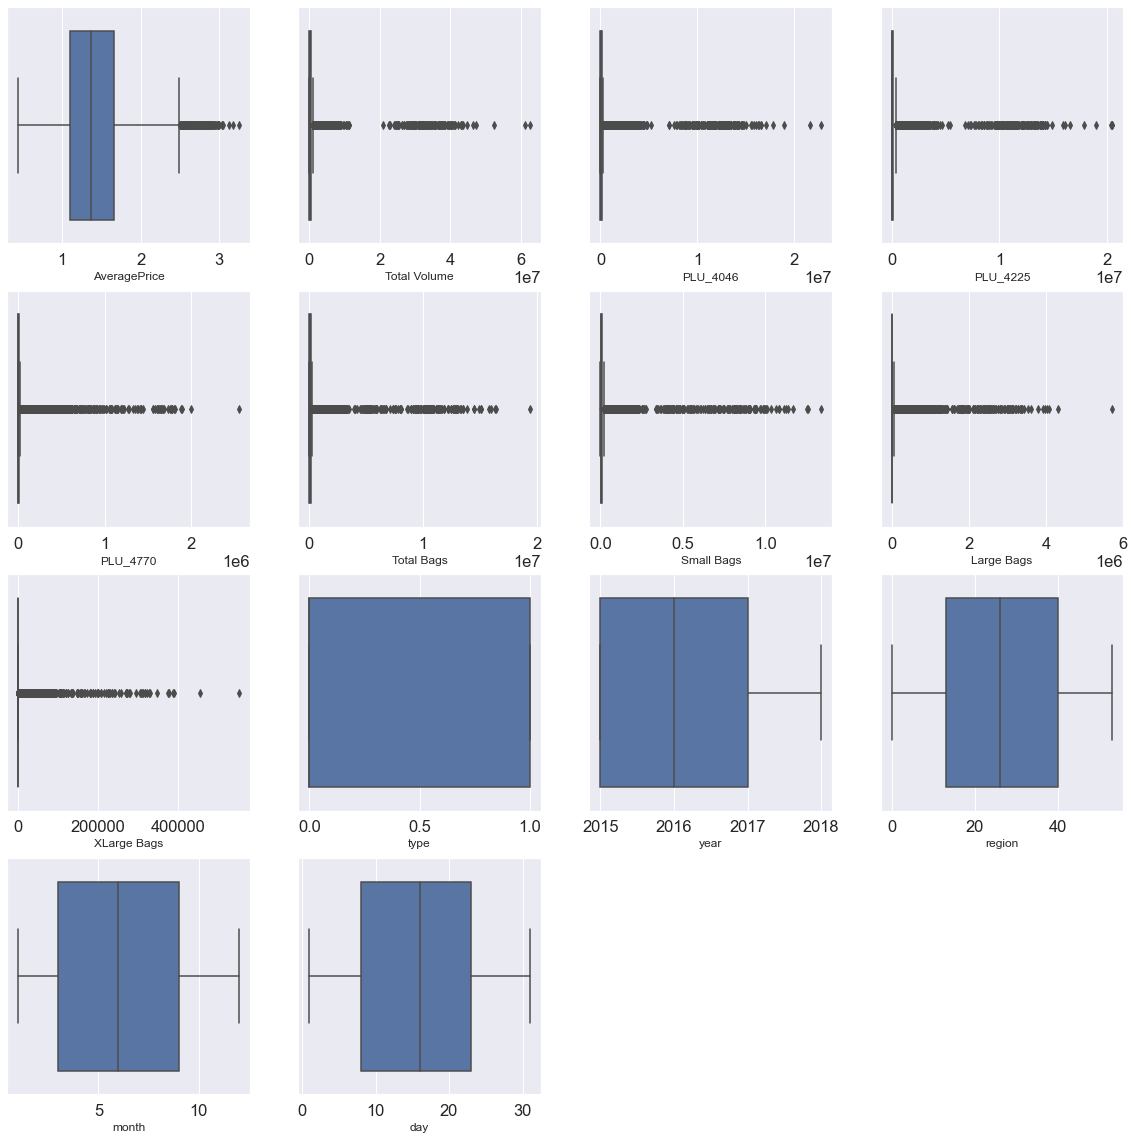

In [40]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if plotnumber <= 15:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=12)
        plotnumber +=1
plt.show()  

- There are outliers in all the columns except year,month,day and as they are categorical no need to check outliers for these columns.
- And in all other columns we can see a huge number of outliers.

# Removing Outliers using Z score Method :

In [41]:
#Features having outliers
features=df[['Total Volume','PLU_4046','PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


- Removed the outliers using zscore method.

In [43]:
#Checking shape of new dataset
df_new.shape

(17782, 14)

In [44]:
#checking the old dataset
df.shape

(18249, 14)

In [45]:
#Checking dataloss
Dataloss = (((18249-17782)/18249)*100)
Dataloss

2.55904433119623

- Using Zscore,2.56% data loss.Which is less than 10%

# Skewness:

In [46]:
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
PLU_4046        4.928850
PLU_4225        4.472729
PLU_4770        5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
month           0.098217
day             0.011251
dtype: float64

- We can notice skewness in almost all columns except year, month and Day.

In [47]:
from sklearn.preprocessing import PowerTransformer
skew_fea=["Total Volume","PLU_4046","PLU_4225","PLU_4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]
scaler = PowerTransformer(method='yeo-johnson')

In [48]:
#Removing skewness using yeo-johnson
df_new[skew_fea] = scaler.fit_transform(df_new[skew_fea].values)


#Removing skewness in H using log1p
df_new["XLarge Bags"]=np.log1p(df_new["XLarge Bags"])

In [49]:
#Checking skewness after removing skewness
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
PLU_4046       -0.038259
PLU_4225       -0.043246
PLU_4770        0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
type           -0.052210
year            0.220792
region          0.005773
month           0.098217
day             0.011251
dtype: float64

- Skewness removed

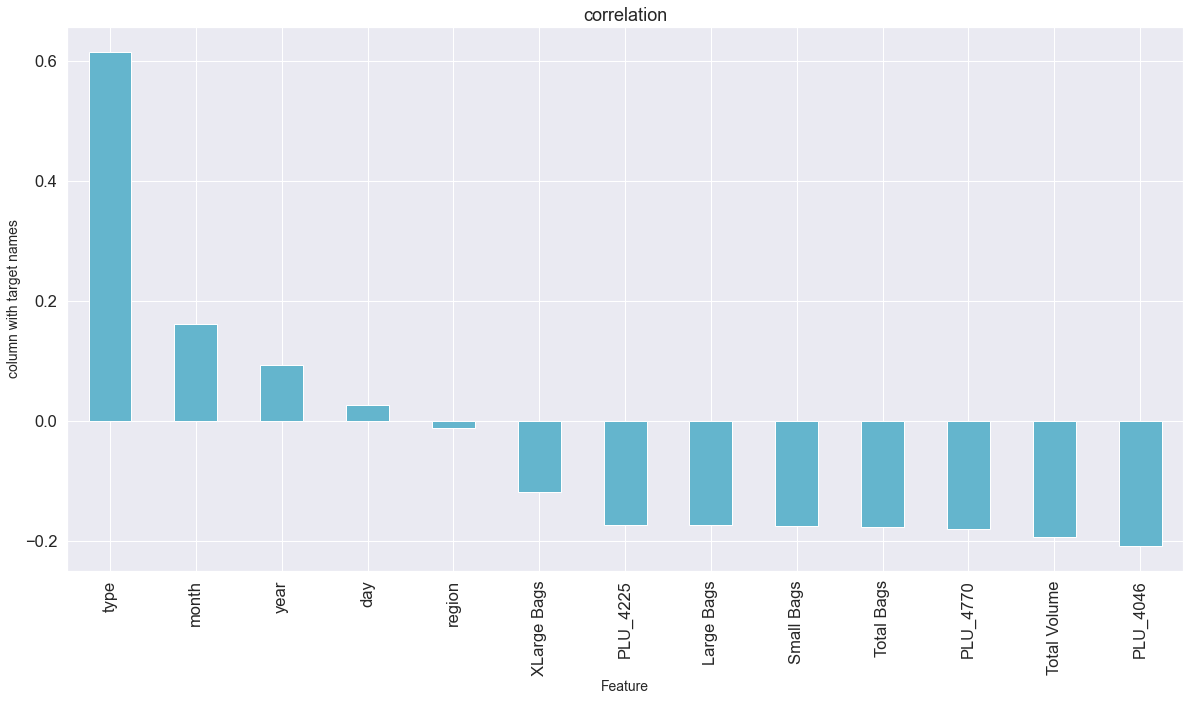

In [50]:
plt.figure(figsize=(20,10))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

- It is observed that 'type' column has the highest positive correlation.

# Preprocessing Pipeline

# Feature Selection

In [51]:
#assign the value of x and y for training and testing phase
x = df.drop(columns=['AveragePrice'])
y = df["AveragePrice"]
print(x.shape)
print(y.shape)

(18249, 13)
(18249,)


In [52]:
scaled_x = scaler.fit_transform(x)

# Choosing the Model:-

In [53]:
#Now by using multiple Algorithms we are calculating the best model which suit best for our data set:- 

model = [DecisionTreeRegressor(),KNN(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = r_state,test_size = 0.30)
    for i in model:
        i.fit(x_train,y_train)
        pred = i.predict(x_test)
        score = r2_score(y_test,pred)
        print("R2 score correspond to random state " ,r_state ,"is", score)
        if score> max_r2_score:
            max_r2_score=score
            final_state = r_state
            final_model = i
            
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  40 is 0.7334670501692397
R2 score correspond to random state  40 is 0.6532555520862258
R2 score correspond to random state  40 is 0.5540140815133268
R2 score correspond to random state  40 is 0.41596171325246223
R2 score correspond to random state  40 is 0.7400922485152819
R2 score correspond to random state  40 is 0.8791037843277919
R2 score correspond to random state  41 is 0.7387297288675294
R2 score correspond to random state  41 is 0.6448006848312402
R2 score correspond to random state  41 is 0.5754598275873752
R2 score correspond to random state  41 is 0.44376019211198425
R2 score correspond to random state  41 is 0.7543800223828565
R2 score correspond to random state  41 is 0.8897205097027788
R2 score correspond to random state  42 is 0.7359394393128801
R2 score correspond to random state  42 is 0.638175801979668
R2 score correspond to random state  42 is 0.5373905648628742
R2 score correspond to random state  42 is 0.4266500306309232
R2 scor

R2 score correspond to random state  62 is 0.659323141361962
R2 score correspond to random state  62 is 0.5615878098814892
R2 score correspond to random state  62 is 0.4473199833792121
R2 score correspond to random state  62 is 0.7528773829132595
R2 score correspond to random state  62 is 0.888226497917666
R2 score correspond to random state  63 is 0.7560139859013717
R2 score correspond to random state  63 is 0.6535015813416741
R2 score correspond to random state  63 is 0.5610430835366564
R2 score correspond to random state  63 is 0.44467268991650877
R2 score correspond to random state  63 is 0.7527631049117519
R2 score correspond to random state  63 is 0.880596982615766
R2 score correspond to random state  64 is 0.7454339494778632
R2 score correspond to random state  64 is 0.6529891091443192
R2 score correspond to random state  64 is 0.5813101004746346
R2 score correspond to random state  64 is 0.4366031385058762
R2 score correspond to random state  64 is 0.7467898663012227
R2 score c

R2 score correspond to random state  84 is 0.5583369210976378
R2 score correspond to random state  84 is 0.4306229399619005
R2 score correspond to random state  84 is 0.7505284556504621
R2 score correspond to random state  84 is 0.8896420174215895
R2 score correspond to random state  85 is 0.7583702293466584
R2 score correspond to random state  85 is 0.6599221275399527
R2 score correspond to random state  85 is 0.5618385556997361
R2 score correspond to random state  85 is 0.45049486009852957
R2 score correspond to random state  85 is 0.7572011353997412
R2 score correspond to random state  85 is 0.8872488721638219
R2 score correspond to random state  86 is 0.7415836770432161
R2 score correspond to random state  86 is 0.6433917650112378
R2 score correspond to random state  86 is 0.5805663111755406
R2 score correspond to random state  86 is 0.4406651003246401
R2 score correspond to random state  86 is 0.7434089865627966
R2 score correspond to random state  86 is 0.8835248203011891
R2 scor

# Train Test Split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .30, random_state =79)

# Linear Regression

In [70]:
#checking r2 score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,predLR))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predLR)))

R2_score: 0.5867559734798127
MAE: 0.20268347747573753
MSE: 0.06741950202938475
RMSE: 0.2596526565036159


# Random Forest Regression Model

In [71]:
#checking r2 score for Random Forest Regression
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,predrf))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,predrf))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predrf)))

R2_score: 0.8933872884888729
MAE: 0.09331738812785387
MSE: 0.017393538584474882
RMSE: 0.13188456537622165


# XGB Regression Model

In [72]:
#checking r2 score for XGB Regression
xg = XGBRegressor()
xg.fit(x_train,y_train)
predxg = xg.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,predxg))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,predxg))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,predxg))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predxg)))

R2_score: 0.9064292129151419
MAE: 0.09102431050239632
MSE: 0.015265788408076473
RMSE: 0.12355479921102407


# Support Vector Regression Model

In [73]:
#checking r2 score for XGB Regression
sv = SVR()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,predsv))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,predsv))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,predsv))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predsv)))

R2_score: 0.787406501880523
MAE: 0.1374844632499983
MSE: 0.03468398054920199
RMSE: 0.18623635667936053


# Checking for Cross Validation Score

In [74]:
# Checking CV score for LinearRegression
print("CV score for LinearRegression:", cross_val_score(LR,scaled_x,y,cv=ShuffleSplit(5)).mean())

# Checking CV score for Random Forest Regression
print("CV score for Random Forest Regression:",cross_val_score(rf,scaled_x,y,cv=ShuffleSplit(5)).mean())

# Checking CV score for XGB Regression
print("CV score for XGB Regression:",cross_val_score(xg,scaled_x,y,cv=ShuffleSplit(5)).mean())

# Checking CV score forSupport Vector Regression 
print("CV score for Support Vector Regression :",cross_val_score(sv,scaled_x,y,cv=ShuffleSplit(5)).mean())

CV score for LinearRegression: 0.5765137527093446
CV score for Random Forest Regression: 0.8971625786193214
CV score for XGB Regression: 0.9043524138055326
CV score for Support Vector Regression : 0.7850808813140483


- Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is one of the best model with lowest Root Mean Squared Error score.

# Hyper Parameter Tuning

In [75]:
# Random Forest Regressor
parameter = {'n_estimators':[30,60,80],
             'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],
             'min_samples_split':[5,10],
             'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [76]:
Best_mod_Reg = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_mod_Reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=60)

In [77]:
rfpred = Best_mod_Reg.predict(x_test)
acc = r2_score(y_test,predrf)
print(acc*100)

89.3387288488873


In [78]:
# Conclusion : -
a =np.array(y_test)
predicted = np.array(rf.predict(x_test))
df_final =  pd.DataFrame({ 'Original' : a,
                     'predicted' :predicted ,
                   },index = range(len(a))) 
df_final

,Original,predicted
0,1.76,1.5925
1,1.81,1.7586
2,1.17,1.1540
3,0.65,0.8895
4,0.73,0.7678
...,...,...
5470,0.95,0.9687
5471,1.49,1.3430
5472,1.80,1.6848
5473,1.54,1.7718


# Save The Regression Model

In [79]:
import joblib
joblib.dump(Best_mod_Reg,"Avocado_Regression.pkl")

['Avocado_Regression.pkl']

The dataset can be seen in two angles to find the region and find the average price, We already did the "Average Price", now let's find the "Region".


# Classification Model Building

In [80]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

# Preprocessing Pipeline

# - Train Test Split

In [81]:
#assign the value of x and y for training and testing phase
xc = df.drop(columns=['region'])
yc = df[["region"]]
print(xc.shape)
print(yc.shape)

(18249, 13)
(18249, 1)


In [82]:
#Standardize the value of x so that mean will be 0 and SD will become 1 and make the data as normal distributed.
sc = StandardScaler()
sc.fit_transform(xc)

array([[-0.18868864, -0.22771641, -0.23081597, ..., -1.22128204,
         1.64763162,  1.29185687],
       [-0.13901962, -0.23042664, -0.23110251, ..., -1.22128204,
         1.64763162,  0.49423066],
       [-1.18206895, -0.21208462, -0.23100731, ..., -1.22128204,
         1.64763162, -0.30339555],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ...,  1.97050371,
        -1.46495942,  0.60817726],
       [ 1.30138182, -0.24162464, -0.2304279 , ...,  1.97050371,
        -1.46495942, -0.18944895],
       [ 0.53151208, -0.24125273, -0.22934712, ...,  1.97050371,
        -1.46495942, -0.98707516]])

In [83]:
model = [LogisticRegression(),RandomForestClassifier(),SVC(),DecisionTreeClassifier()]
max_acc_score = 0
for r_state in range(40,60):
    xc_train,xc_test,yc_train,yc_test = train_test_split(xc,yc,random_state = r_state,test_size = 0.30)
    for i in model:
        i.fit(xc_train,yc_train)
        pred = i.predict(xc_test)
        score = accuracy_score(yc_test,pred)
        print("acc score correspond to random state " ,r_state ,"is", score)
        if score> max_acc_score:
            max_acc_score=score
            final_state = r_state
            final_model = i
            
print("max acc score correspond to random state " ,final_state , "is" , max_acc_score ,"and model is",final_model)

acc score correspond to random state  40 is 0.13150684931506848
acc score correspond to random state  40 is 0.8993607305936073
acc score correspond to random state  40 is 0.15762557077625572
acc score correspond to random state  40 is 0.7895890410958905
acc score correspond to random state  41 is 0.13936073059360732
acc score correspond to random state  41 is 0.908675799086758
acc score correspond to random state  41 is 0.15598173515981736
acc score correspond to random state  41 is 0.7784474885844749
acc score correspond to random state  42 is 0.13168949771689498
acc score correspond to random state  42 is 0.8991780821917809
acc score correspond to random state  42 is 0.1587214611872146
acc score correspond to random state  42 is 0.7873972602739726
acc score correspond to random state  43 is 0.13150684931506848
acc score correspond to random state  43 is 0.8968036529680365
acc score correspond to random state  43 is 0.15378995433789955
acc score correspond to random state  43 is 0.789

# Cross Validation of Models:-

In [84]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=51)
cvs = cross_val_score(LogisticRegression(), xc, yc, cv=cv)
print("Cross Validation of LogisticRegression model ",cvs.mean())

Cross Validation of LogisticRegression model  0.13176255707762558


In [85]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=51)
cvs = cross_val_score(RandomForestClassifier(), xc, yc, cv=cv)
print("Cross Validation of RandomForest Classifier model ",cvs.mean())

Cross Validation of RandomForest Classifier model  0.9053881278538812


In [86]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=51)
cvs = cross_val_score(SVC(), xc, yc, cv=cv)
print("Cross Validation of SVM Classifier model ",cvs.mean())

Cross Validation of SVM Classifier model  0.15554337899543377


In [87]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=51)
cvs = cross_val_score(DecisionTreeClassifier(), xc, yc, cv=cv)
print("Cross Validation of DecisionTree Classifier model ",cvs.mean())

Cross Validation of DecisionTree Classifier model  0.7900639269406392


In [88]:
from sklearn.model_selection import ShuffleSplit
n_samples = xc.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=51)
cvs = cross_val_score(AdaBoostClassifier(), xc, yc, cv=cv)
print("Cross Validation of AdaBoost Classifier model ",cvs.mean())

Cross Validation of AdaBoost Classifier model  0.06955251141552513


- Crossvalidation score is maximum for Random Forest classifier,so will do Hyperparameter tuning for RandomForest.

In [89]:
#Checking the best parameter for prediction of Random Forest Regressor Algo using GridSearchCV
xc_train,xc_test,yc_train,yc_test = train_test_split(xc,yc,random_state = 41,test_size = 0.30)
rf = RandomForestClassifier()
parameters={'n_estimators' : [100,200],'criterion':['gini','entropy']}
gridsearch=GridSearchCV(rf,parameters)
gridsearch.fit(xc_train,yc_train)
gridsearch.best_params_

{'criterion': 'gini', 'n_estimators': 200}

In [90]:
# Providing best parameters to Model:
rf = RandomForestClassifier(criterion='gini',n_estimators=200)
rf.fit(xc_train,yc_train)
pred = rf.predict(xc_test)
score = accuracy_score(yc_test,pred)
print("Accuracy Score :",score*100)

Accuracy Score : 91.17808219178082


In [91]:
print(confusion_matrix(yc_test,pred))

[[ 89   0   0 ...   0   0   0]
 [  0  93   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   1  90   0]
 [  0   2   4 ...   0   0  88]]


In [92]:
print(classification_report(yc_test,pred)) 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        95
           1       0.87      0.84      0.85       111
           2       0.90      1.00      0.95        96
           3       0.89      0.89      0.89        95
           4       0.93      0.97      0.95       110
           5       0.89      0.88      0.88       104
           6       0.97      1.00      0.99       108
           7       0.92      0.88      0.90       112
           8       0.99      0.97      0.98        94
           9       0.91      0.93      0.92        97
          10       0.86      0.92      0.89       106
          11       0.95      0.95      0.95       114
          12       0.96      0.94      0.95        98
          13       0.88      0.84      0.86        95
          14       0.92      0.89      0.91       102
          15       0.99      0.99      0.99       103
          16       0.98      0.96      0.97        99
          17       0.92    

# Roc Curve:

In [101]:
pred_probab = rf.predict_proba(xc_test)[:,1]
pred_probab

array([0.   , 0.   , 0.   , ..., 0.   , 0.025, 0.09 ])

In [102]:
fpr,tpr,thresholds = roc_curve(yc_test,pred_probab,pos_label=True)

In [103]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.72856078e-04 3.72856078e-04
 5.59284116e-04 7.45712155e-04 7.45712155e-04 7.45712155e-04
 9.32140194e-04 1.30499627e-03 1.30499627e-03 1.30499627e-03
 1.30499627e-03 1.49142431e-03 1.49142431e-03 1.67785235e-03
 1.86428039e-03 1.86428039e-03 2.05070843e-03 2.05070843e-03
 2.23713647e-03 2.60999254e-03 2.79642058e-03 2.98284862e-03
 3.16927666e-03 3.35570470e-03 3.72856078e-03 4.66070097e-03
 5.03355705e-03 5.03355705e-03 5.40641312e-03 5.59284116e-03
 6.33855332e-03 6.71140940e-03 7.45712155e-03 7.82997763e-03
 8.01640567e-03 8.76211782e-03 9.32140194e-03 9.88068606e-03
 1.02535421e-02 1.062639

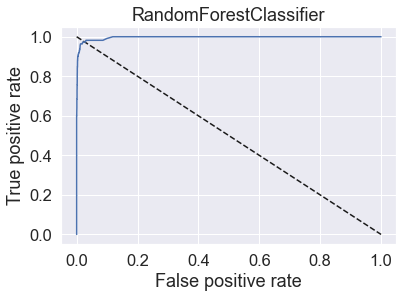

In [104]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

As from this data set we have following conclusion:

- taking price as y variable is predicting well for this model as comapared to region.
- also r2 score value is also greater then accuracy score.

# Save the Classification model

In [105]:
joblib.dump(rf, 'Avocado_class.pkl')

['Avocado_class.pkl']

# Concluding Remarks

- In addition, the score value of R2 is also greater than the accuracy score.
- The average price, the total exchanges and the total volume are well distributed among all the other columns.
- Since year is the most negatively correlated column of all columns.
- Between August and October the price of avocado is much higher compared to other months.
- Hartford Springfield, San Francisco and New York are having more average price as compared to another region.
- As organic type of avocado is having the more price per unit then conventional.
- I had done prediction using region and price but using price the prediction score is high as compared to region.
- So in this data set we are using both regression and classification technique for making this model.